In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Load data from csv file
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [8]:
# Rename Life Expectancy column to something shorter/easier to use
df.rename({"Life expectancy at birth (years)": "LE"}, axis = 1, inplace = "True")

# Update GDP value by dividing by 1 billion for easier use
df['GDP_billion'] = df['GDP']/1000000000

print(df.head())

  Country  Year    LE           GDP  GDP_billion
0   Chile  2000  77.3  7.786093e+10    77.860932
1   Chile  2001  77.3  7.097992e+10    70.979924
2   Chile  2002  77.8  6.973681e+10    69.736811
3   Chile  2003  77.9  7.564346e+10    75.643460
4   Chile  2004  78.0  9.921039e+10    99.210393


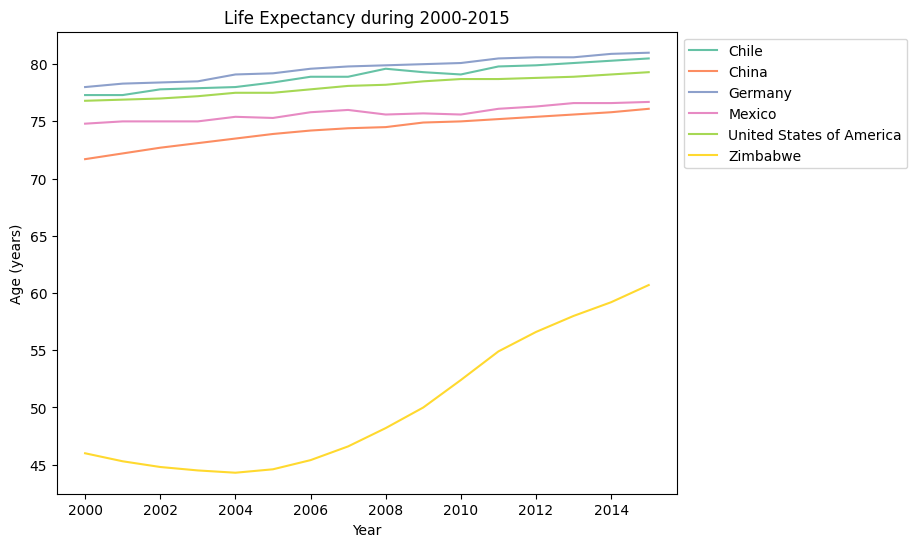

<Figure size 640x480 with 0 Axes>

In [25]:
# Question 1: Has life expectancy increased over time in the six nations?

# Create a Figure
figure = plt.subplots(figsize = (8, 6))

# Plot Graph
sns.lineplot(data = df, x = 'Year', y = "LE", hue = 'Country', palette = 'Set2')

plt.title("Life Expectancy during 2000-2015")
plt.xlabel("Year")
plt.ylabel("Age (years)")
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left')

plt.show()
plt.clf()

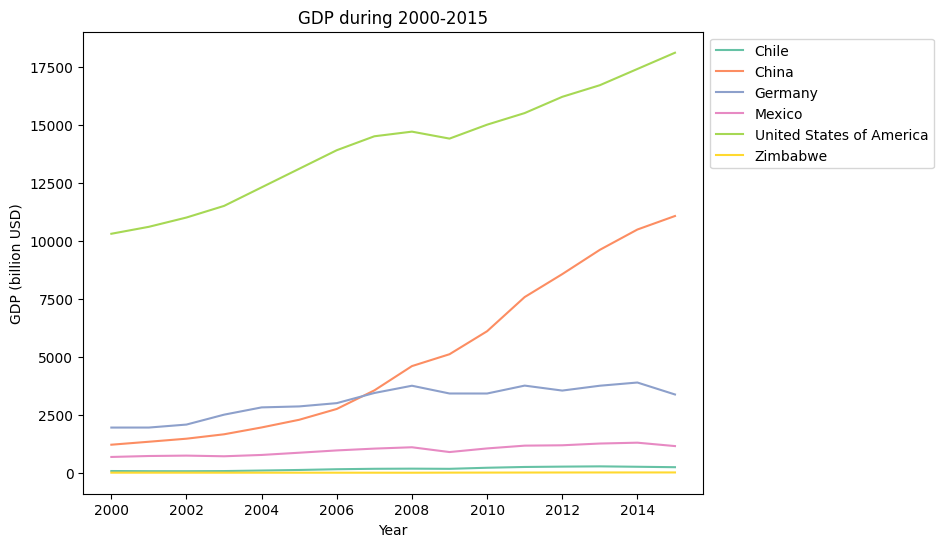

<Figure size 640x480 with 0 Axes>

In [24]:
# Question 2: Has GDP increased over time in the six nations?

# Create a Figure
figure = plt.subplots(figsize = (8, 6))

# Plot Graph
sns.lineplot(data = df, x = 'Year', y = 'GDP_billion', hue = 'Country', palette = 'Set2')

plt.title("GDP during 2000-2015")
plt.xlabel("Year")
plt.ylabel("GDP (billion USD)")
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left')

plt.show()
plt.clf()

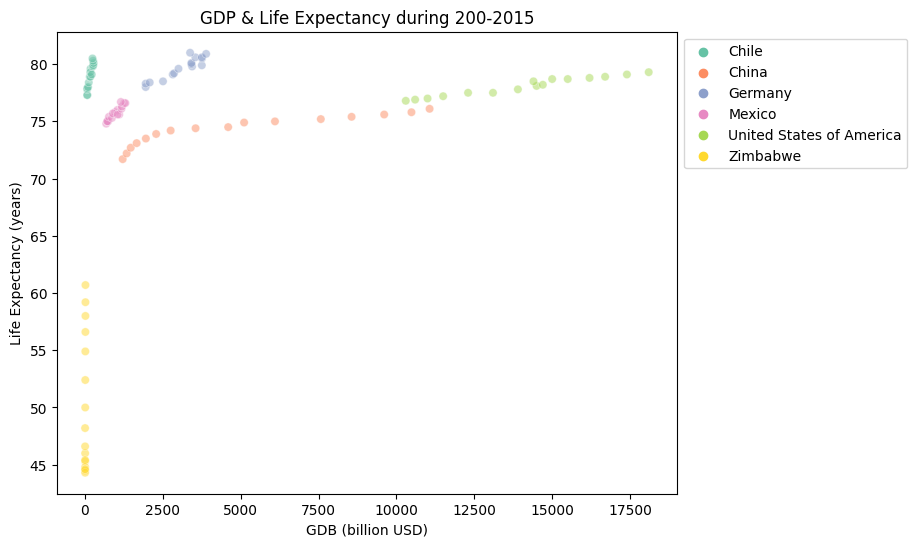

<Figure size 640x480 with 0 Axes>

In [26]:
# Question 3: Is there a correlation between GDP and life expectancy of a country?

# Create a Figure
figure = plt.subplots(figsize = (8, 6))

# Plot Graph
sns.scatterplot(data = df, x = 'GDP_billion', y = 'LE', hue = 'Country', palette = 'Set2', alpha = 0.5)

plt.title("GDP & Life Expectancy during 200-2015")
plt.xlabel("GDB (billion USD)")
plt.ylabel("Life Expectancy (years)")
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left')

plt.show()
plt.clf()

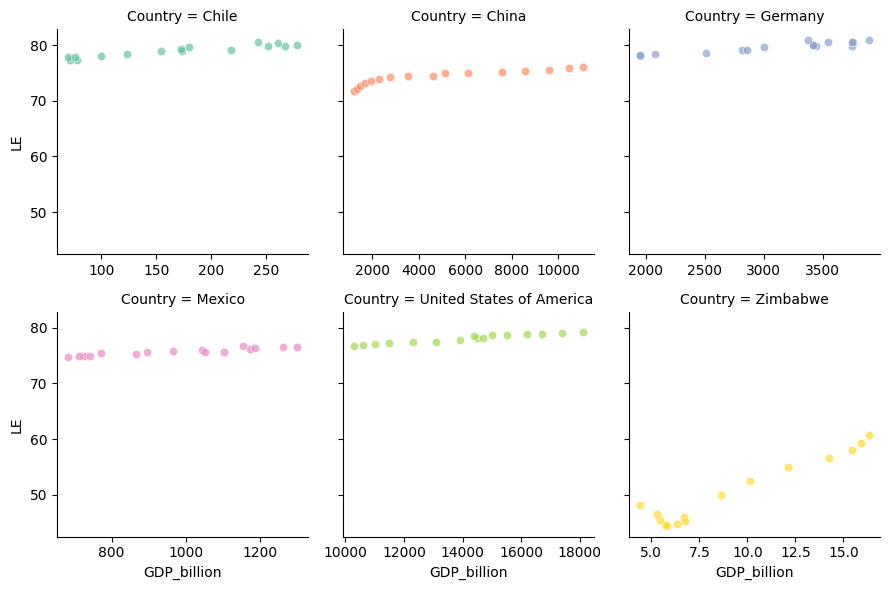

<Figure size 640x480 with 0 Axes>

In [28]:
# To get a better look at each country individually...
plot_by_country = sns.FacetGrid(df, col = 'Country', col_wrap = 3, height = 3, sharex = False, hue = 'Country', palette = 'Set2')
plot_by_country.map(sns.scatterplot, 'GDP_billion', 'LE', data = df, alpha = 0.7)

plt.show()
plt.clf()

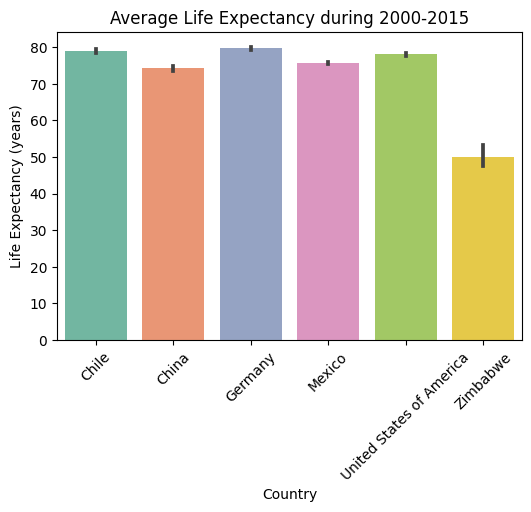

<Figure size 640x480 with 0 Axes>

In [34]:
# Question 4: What is the average life expectancy in these nations?

# Create a Figure
plt.figure(figsize = (6, 4))
ax = plt.subplot()

# Plot Graph
sns.barplot(data = df, x = 'Country', y = 'LE', palette = 'Set2', estimator = np.mean)
ax.set_xticklabels(labels = df.Country.unique(), rotation = 45)
ax.set_xlabel("Country")
ax.set_ylabel("Life Expectancy (years)")
ax.set_title("Average Life Expectancy during 2000-2015")

plt.show()
plt.clf()